1. Manually take confocal image at specified coordinates.
2. Use diff_register code to extract same image from tilescan image.
3. Convert both images to same coordinates.
4. Compare the images using some algorithm (here: https://www.pyimagesearch.com/2014/09/15/python-compare-two-images/)

In [1]:
from diff_register import register as reg
from diff_classifier import aws as aws
import skimage.io as sio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
reg.read_xmlpoints

<function diff_register.register.read_xmlpoints>

In [3]:
#Input parameters. Pixel ratios of input cell tilescales and trajectory vidoes (units of microns per pixel) and image
#dimensions in pixels.

pxrat_cells = 1.24
pxrat_traj = 0.16

dim_traj = 2048
dim_cells = int(np.round(dim_traj*pxrat_traj/pxrat_cells, decimals=0))

In [4]:
dim_cells

264

In [5]:
remote_folder = 'Validation/07_20_18_registration_validation'
tilescan = '20x_tilescan.tif'
pointvids = '40x_points.tif'
multipoints = 'multipoints.xml'

In [6]:
# aws.download_s3('{}/{}'.format(remote_folder, tilescan), tilescan, bucket_name='ccurtis.data')
# aws.download_s3('{}/{}'.format(remote_folder, pointvids), pointvids, bucket_name='ccurtis.data')
# aws.download_s3('{}/{}'.format(remote_folder, multipoints), multipoints, bucket_name='ccurtis.data')

In [7]:
tiled = sio.imread(tilescan)
pointv = sio.imread(pointvids)

In [8]:
pointv.shape

(6, 2044, 2048)

(-0.5, 2047.5, 2043.5, -0.5)

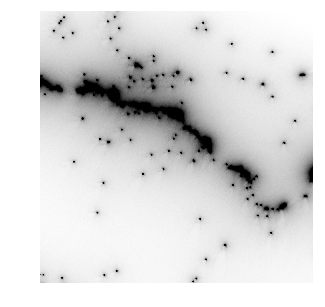

In [9]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(pointv[1, :, :], cmap='binary', vmin=500, vmax=20000)
plt.axis('off')

(-0.5, 2397.5, 2357.5, -0.5)

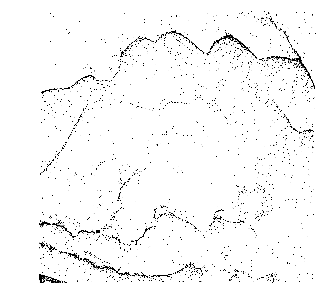

In [10]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(tiled, cmap='binary', vmin=500, vmax=4000)
plt.axis('off')

In [17]:
xmlpoints = reg.read_xmlpoints(multipoints, converttopix=True, umppx=1.24, offset=(-7086, -5524))

In [35]:
xmlpoints

[(2061.2903225806454, 158.38709677419325),
 (2172.0967741935483, 1896.4516129032259),
 (1170.8064516129027, 1070.8064516129034),
 (586.7741935483866, 579.6774193548389),
 (462.01612903225777, 1619.9193548387095),
 (327.25806451612846, 196.29032258064487)]

In [213]:
xmlmod = []

for point in xmlpoints:
    xmlmod.append((tiled.shape[0]-point[0], point[1]))

In [215]:
xmlmod

[(296.70967741935465, 158.38709677419325),
 (185.9032258064517, 1896.4516129032259),
 (1187.1935483870973, 1070.8064516129034),
 (1771.2258064516134, 579.6774193548389),
 (1895.9838709677422, 1619.9193548387095),
 (2030.7419354838717, 196.29032258064487)]

In [19]:
tiled.shape

(2358, 2398)

In [278]:
def crop_to_videodims(cell_image, multichannel = False, vidpoint=(600, 600), defaultdims=True, dim=512, save=True,
                      fname='test.tif'):
    
    if defaultdims:
        ndim = 512
    else:
        ndim = dim

    if not multichannel:
        subim = cell_image[int(vidpoint[1]-ndim/2):int(vidpoint[1]+ndim/2), int(vidpoint[0]-ndim/2+25):int(vidpoint[0]+ndim/2+25)]
        #subim = cell_image[int(vidpoint[1]-ndim/2):int(vidpoint[1]+ndim/2), int(vidpoint[0]-ndim-20):int(vidpoint[0])-20]
    if save:
        sio.imsave(fname, subim)
        
    return subim

In [197]:
tiled.shape

(2358, 2398)

In [282]:
subim = crop_to_videodims(tiled, vidpoint=xmlmod[0], defaultdims=False, dim=dim_cells, fname='test.tif')

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: test.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(-0.5, 263.5, 263.5, -0.5)

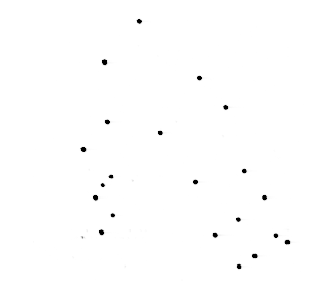

In [283]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(subim, cmap='binary')
plt.axis('off')

(-0.5, 2047.5, 2043.5, -0.5)

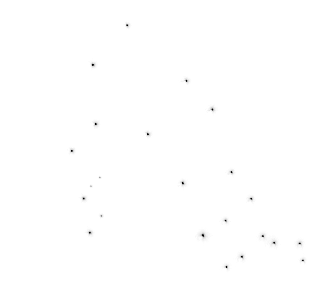

In [281]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(pointv[0, :, :], cmap='binary', vmin=500, vmax=20000)
plt.axis('off')